# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [3]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
#!pip install --upgrade scikit-learn

In [5]:
# Load basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import sklearn

In [6]:
data = pd.read_excel('/content/drive/MyDrive/Data_Train.xlsx')

In [7]:
data.shape

(5699, 9)

In [8]:
pd.set_option('display.max_rows', None)
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [9]:
# Get the number of unique values in each column
data.nunique()

Title           5130
Author          3438
Edition         3183
Reviews           36
Ratings          333
Synopsis        5114
Genre            335
BookCategory      11
Price           1538
dtype: int64

In [10]:
# Check for missing values
data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5699 non-null   object 
 1   Author        5699 non-null   object 
 2   Edition       5699 non-null   object 
 3   Reviews       5699 non-null   object 
 4   Ratings       5699 non-null   object 
 5   Synopsis      5699 non-null   object 
 6   Genre         5699 non-null   object 
 7   BookCategory  5699 non-null   object 
 8   Price         5699 non-null   float64
dtypes: float64(1), object(8)
memory usage: 400.8+ KB


# Data preprocessing

In [12]:
# Extract numeric part from 'Ratings' column and convert to int
data['Ratings'] = data['Ratings'].str.extract('(\d+)').astype(int)

# Verify the changes
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [13]:
# Extract numeric part from 'Reviews' column and convert to float
data['Reviews'] = data['Reviews'].str.extract('([\d.]+)').astype(float)

# Verify the changes
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [14]:
# Extract date and edition type from 'Edition' column
data['Edition_Date'] = data['Edition'].str.extract('(\d+\s\w+\s\d+)', expand=False)
data['Edition_Type'] = data['Edition'].str.extract('(^[^\d]+)')

# Remove ",–" from 'Edition_Type' column
data['Edition_Type'] = data['Edition_Type'].str.replace(',–', '')

# Convert the extracted date to datetime
data['Edition_Date'] = pd.to_datetime(data['Edition_Date'], errors='coerce')

# Verify the changes
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Date,Edition_Type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016-03-10,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012-11-07,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982-02-25,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017-10-05,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006-10-10,Hardcover


In [15]:
# Drop the 'Edition' column
data.drop('Edition', axis=1, inplace=True)

# Verify the changes
data.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Date,Edition_Type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016-03-10,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012-11-07,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982-02-25,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017-10-05,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006-10-10,Hardcover


In [16]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from 'Ratings'
data = remove_outliers(data, 'Ratings')

# Remove outliers from 'Price'
data = remove_outliers(data, 'Price')

# Verify the changes
data.shape


(4553, 10)

In [17]:
# Split categories in 'BookCategory' and create new binary columns
book_category_split = data['BookCategory'].str.get_dummies(sep=', ')

# Concatenate the new DataFrame with the original one
data = pd.concat([data, book_category_split], axis=1)

# Verify the changes
data.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Date,Edition_Type,...,Diaries & True Accounts,Film & Photography,Humour,Internet & Digital Media,Language,Linguistics & Writing,Politics,Romance,Sports,Thriller & Mystery
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016-03-10,Paperback,...,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012-11-07,Paperback,...,1,0,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982-02-25,Paperback,...,0,0,1,0,0,0,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017-10-05,Paperback,...,0,0,0,0,0,0,0,0,0,1
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006-10-10,Hardcover,...,0,1,0,0,0,0,0,0,0,0


In [18]:
data.shape

(4553, 26)

In [19]:
# Get the number of unique values in each column
data.nunique()

Title                       4139
Author                      2826
Reviews                       36
Ratings                       49
Synopsis                    4117
Genre                        320
BookCategory                  11
Price                       1149
Edition_Date                2096
Edition_Type                  65
Action & Adventure             2
Arts                           2
Biographies                    2
Comics & Mangas                2
Computing                      2
Crime                          2
Diaries & True Accounts        2
Film & Photography             2
Humour                         2
Internet & Digital Media       2
Language                       2
Linguistics & Writing          2
Politics                       2
Romance                        2
Sports                         2
Thriller & Mystery             2
dtype: int64

In [20]:
# Check for missing values
data.isnull().sum()

Title                         0
Author                        0
Reviews                       0
Ratings                       0
Synopsis                      0
Genre                         0
BookCategory                  0
Price                         0
Edition_Date                316
Edition_Type                  0
Action & Adventure            0
Arts                          0
Biographies                   0
Comics & Mangas               0
Computing                     0
Crime                         0
Diaries & True Accounts       0
Film & Photography            0
Humour                        0
Internet & Digital Media      0
Language                      0
Linguistics & Writing         0
Politics                      0
Romance                       0
Sports                        0
Thriller & Mystery            0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4553 entries, 0 to 5698
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Title                     4553 non-null   object        
 1   Author                    4553 non-null   object        
 2   Reviews                   4553 non-null   float64       
 3   Ratings                   4553 non-null   int64         
 4   Synopsis                  4553 non-null   object        
 5   Genre                     4553 non-null   object        
 6   BookCategory              4553 non-null   object        
 7   Price                     4553 non-null   float64       
 8   Edition_Date              4237 non-null   datetime64[ns]
 9   Edition_Type              4553 non-null   object        
 10  Action & Adventure        4553 non-null   int64         
 11  Arts                      4553 non-null   int64         
 12  Biographies         

In [22]:
data.describe()

,Reviews,Ratings,Price,Action & Adventure,Arts,Biographies,Comics & Mangas,Computing,Crime,Diaries & True Accounts,Film & Photography,Humour,Internet & Digital Media,Language,Linguistics & Writing,Politics,Romance,Sports,Thriller & Mystery
count,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000
mean,4.279969,9.967274,429.809075,0.142763,0.077971,0.084120,0.095761,0.069185,0.117505,0.084120,0.077971,0.088733,0.069185,0.101472,0.101472,0.053591,0.091149,0.077751,0.117505
std,0.680676,11.147676,248.904347,0.349869,0.268155,0.277599,0.294296,0.253797,0.322056,0.277599,0.268155,0.284389,0.253797,0.301985,0.301985,0.225234,0.287852,0.267809,0.322056
min,1.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000,5.000000,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.800000,14.000000,543.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,49.000000,1214.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Univariate Variable Analysis



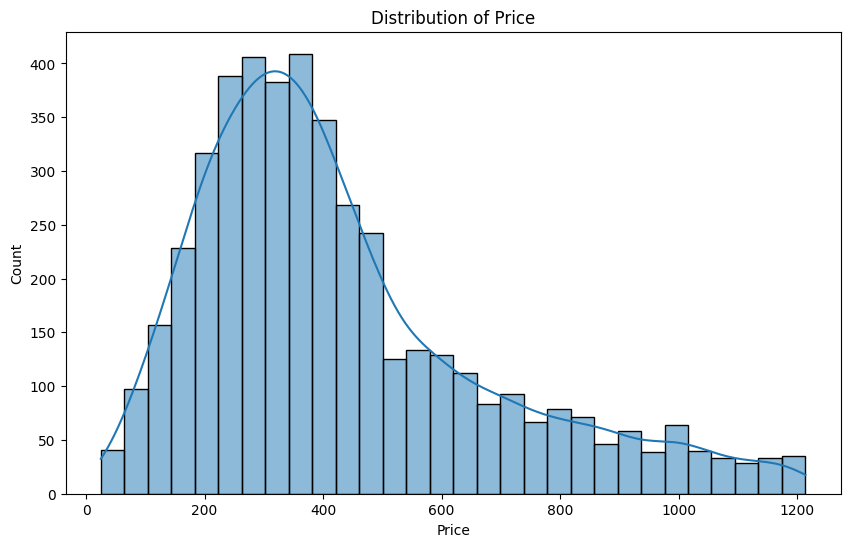

In [23]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

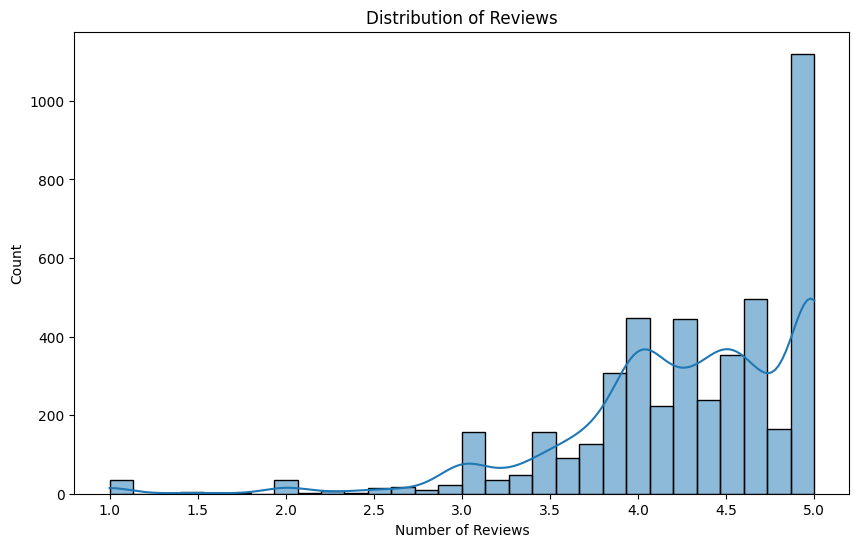

In [24]:
# Distribution of Reviews
plt.figure(figsize=(10, 6))
sns.histplot(data['Reviews'], bins=30, kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

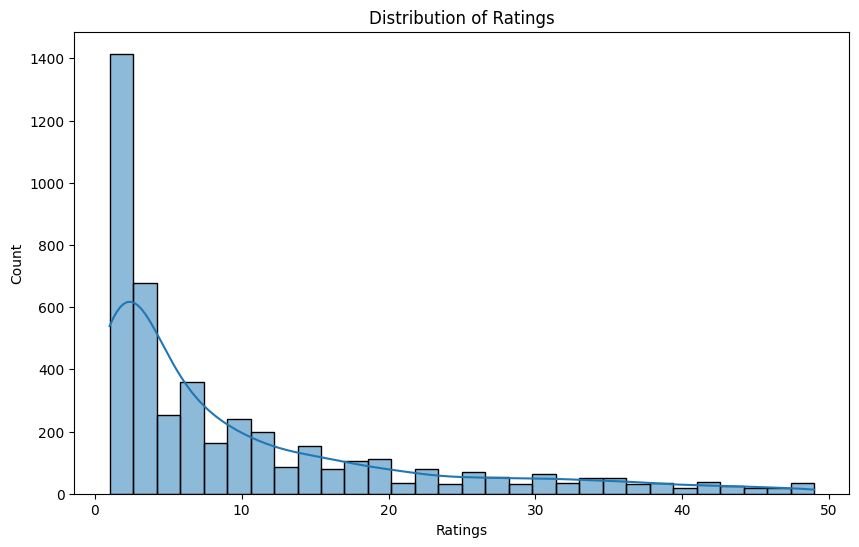

In [25]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Ratings'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.show()

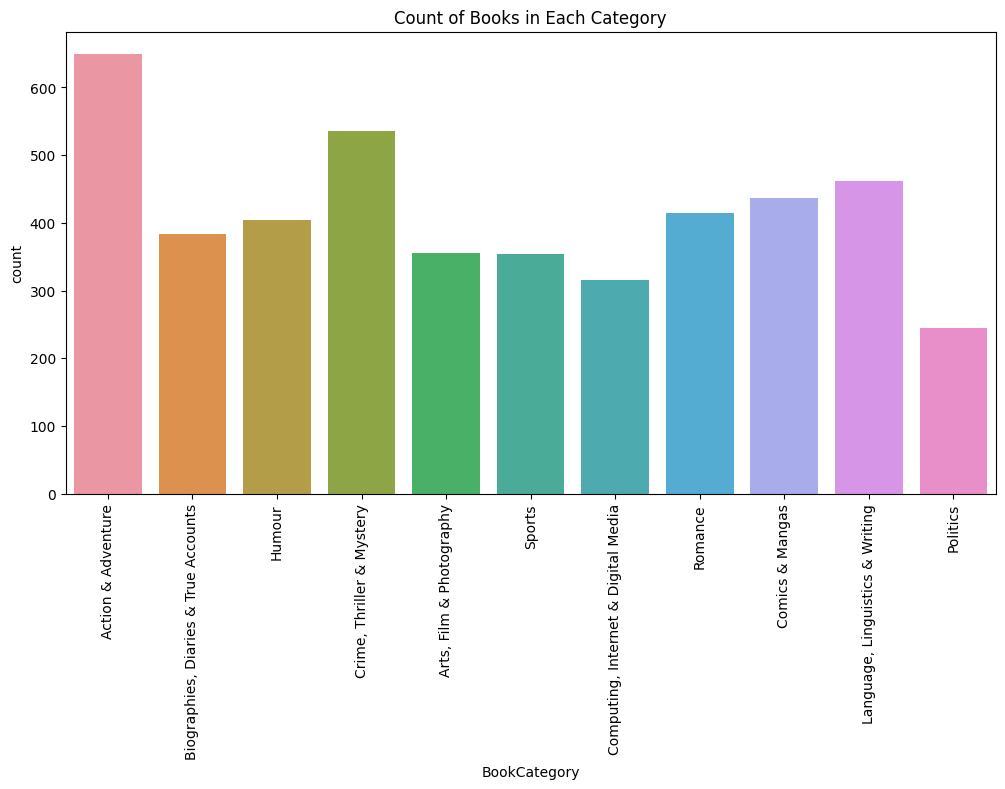

In [26]:
# Count plot for BookCategory
plt.figure(figsize=(12, 6))
sns.countplot(x='BookCategory', data=data)
plt.title('Count of Books in Each Category')
plt.xticks(rotation=90)
plt.show()

## Basic Data Analysis



<ipython-input-27-7113cf7bfac1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


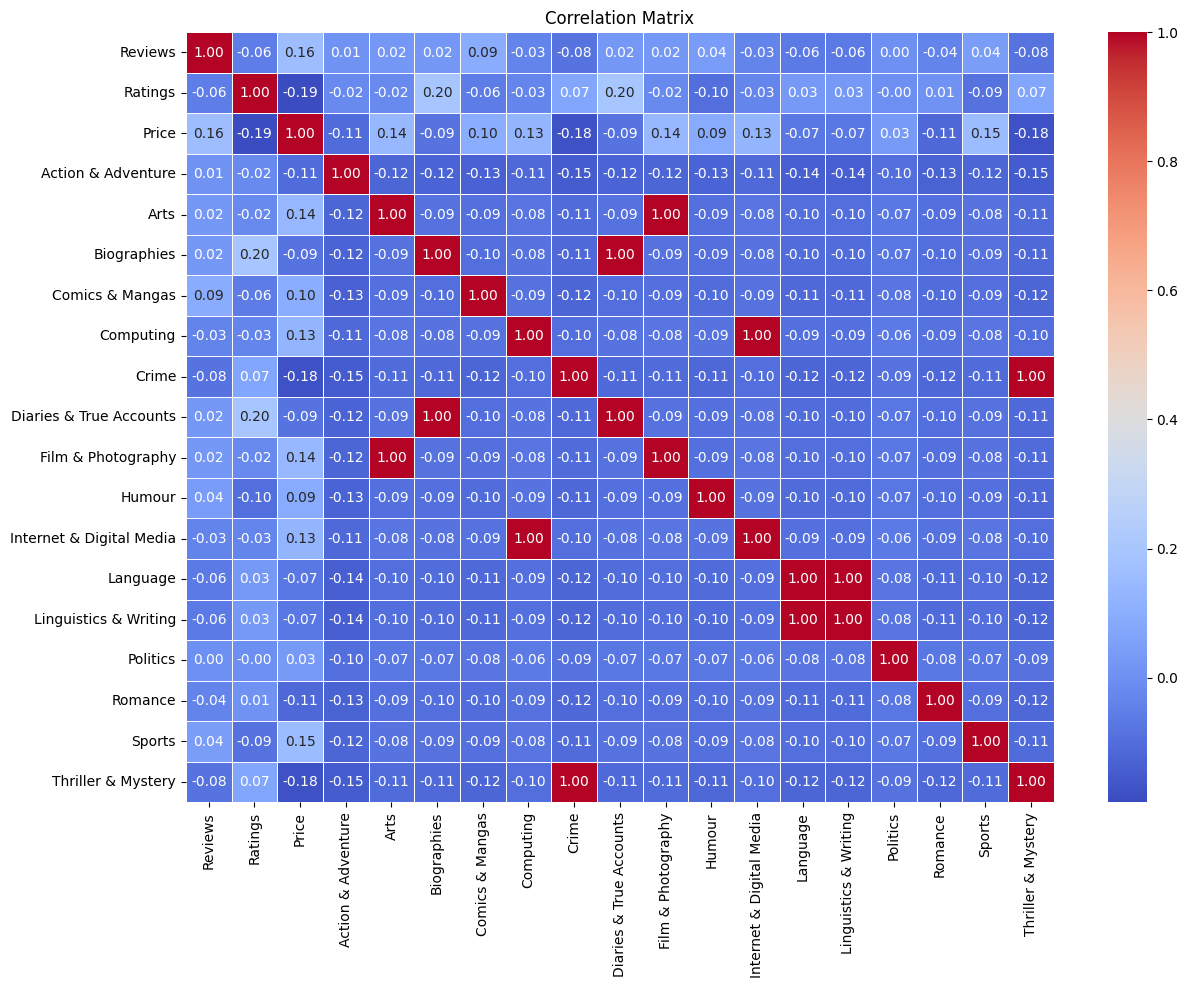

In [27]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

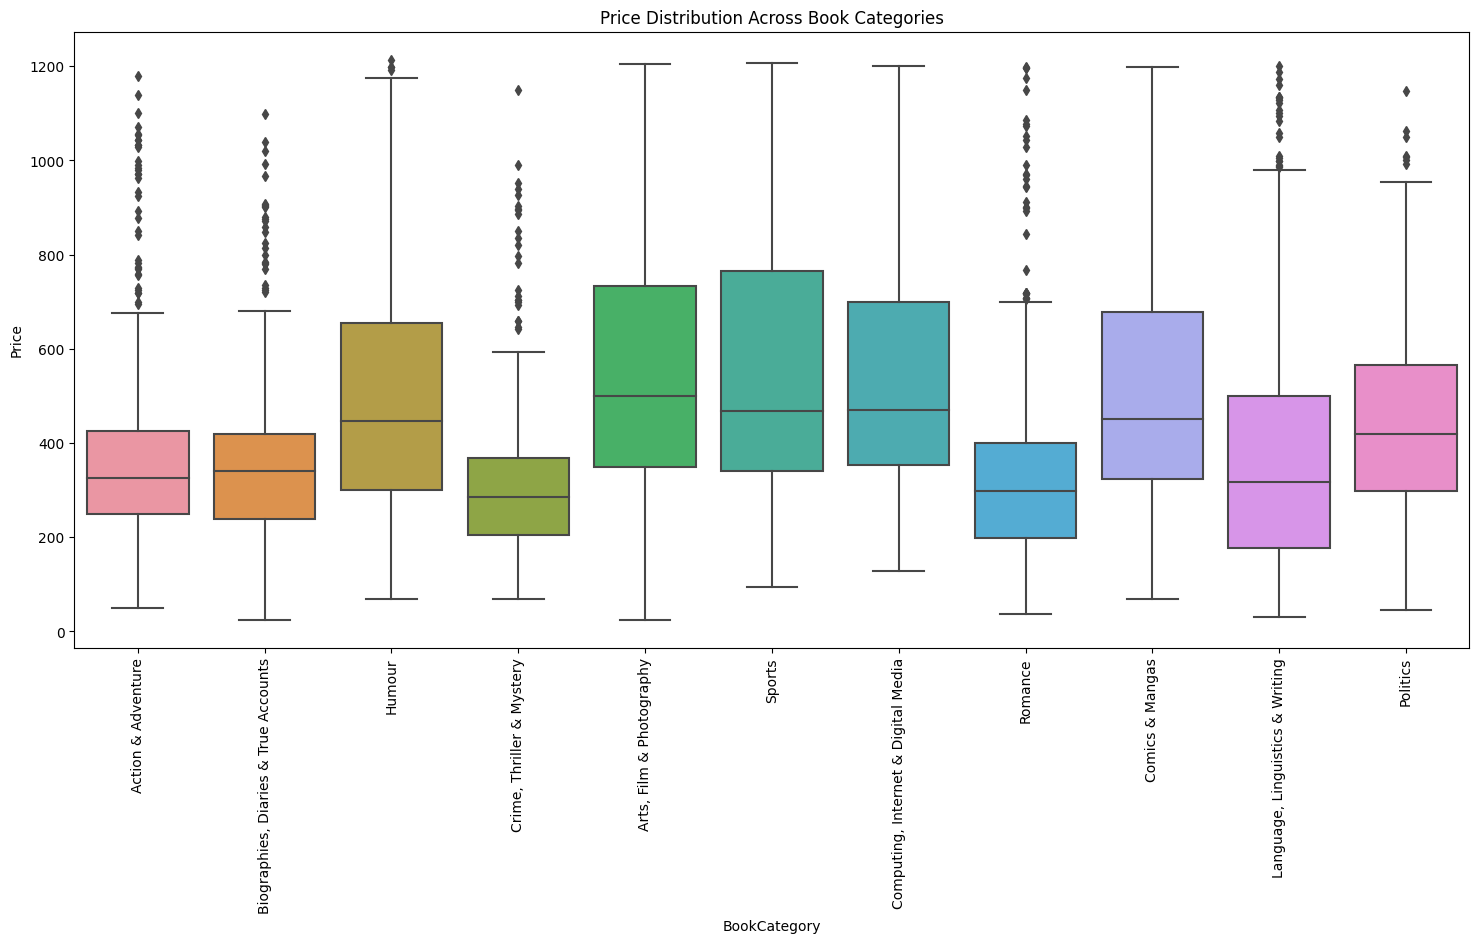

In [28]:
# Boxplot of Price by Book Category
plt.figure(figsize=(18, 8))
sns.boxplot(x='BookCategory', y='Price', data=data)
plt.title('Price Distribution Across Book Categories')
plt.xticks(rotation=90)
plt.show()

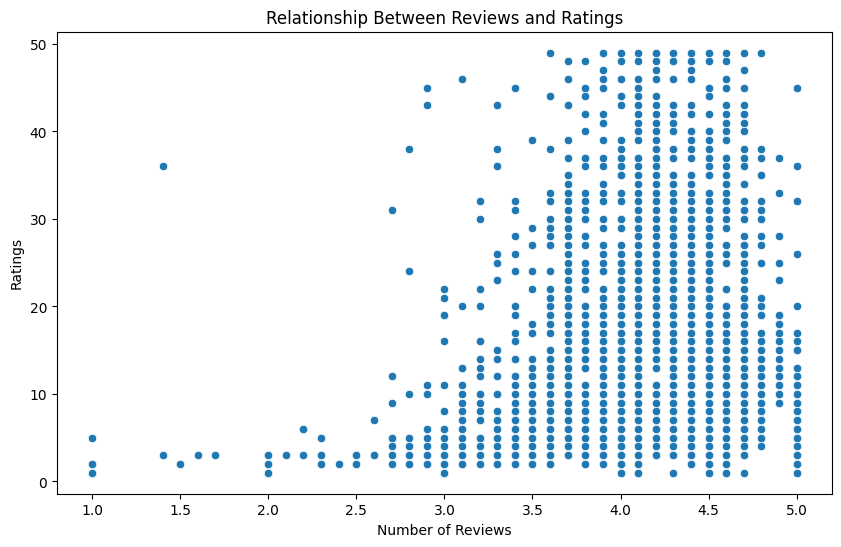

In [29]:
# Scatter plot of Reviews vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Ratings', data=data)
plt.title('Relationship Between Reviews and Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Ratings')
plt.show()

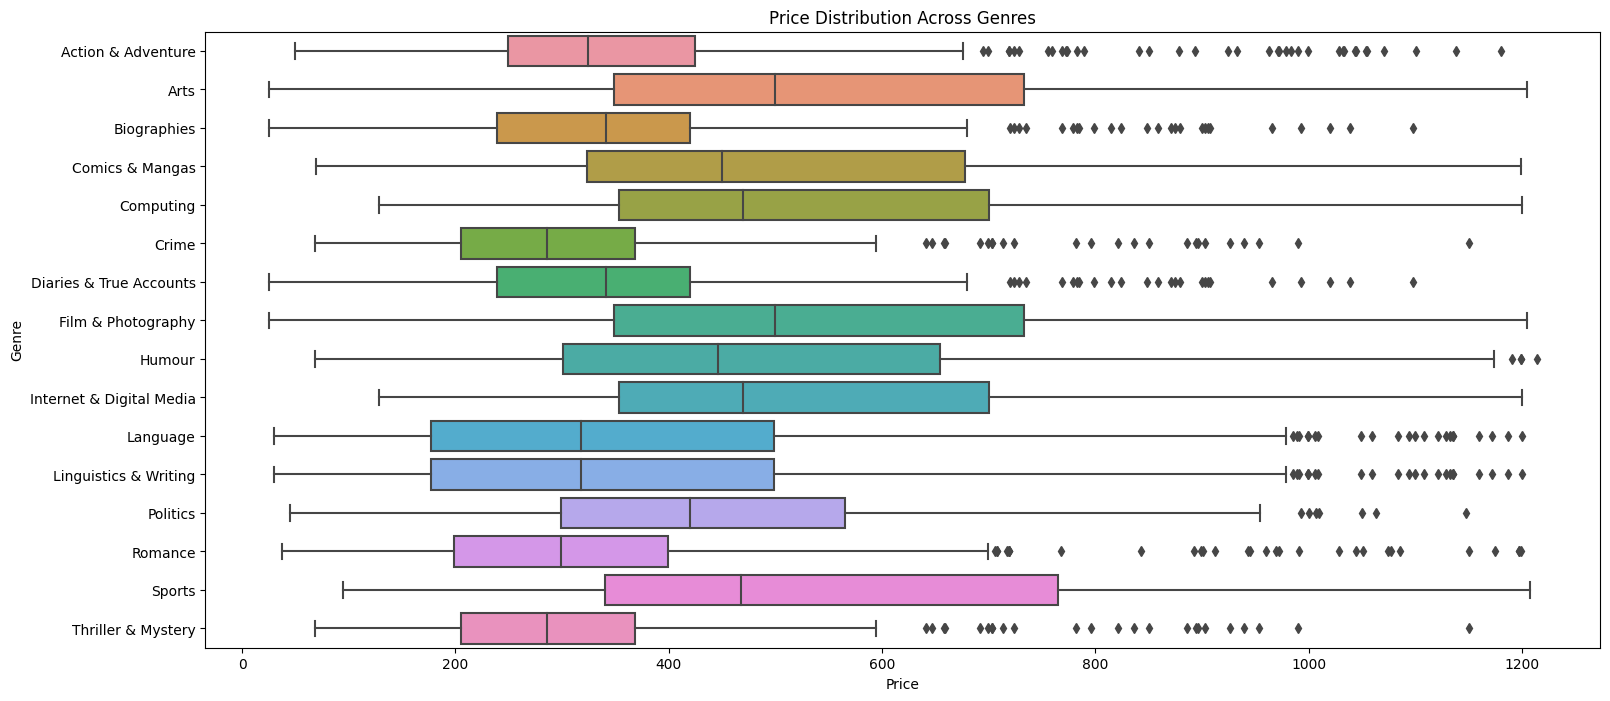

In [30]:
# Extract genre columns
genre_columns = data.columns[10:]

# Melt the DataFrame for boxplot
melted_data = pd.melt(data, id_vars='Price', value_vars=genre_columns, var_name='Genre', value_name='Genre_Flag')

# Create a boxplot for each genre
plt.figure(figsize=(18, 8))
sns.boxplot(data=melted_data[melted_data['Genre_Flag'] == 1], x='Price', y='Genre')
plt.title('Price Distribution Across Genres')
plt.xlabel('Price')
plt.show()


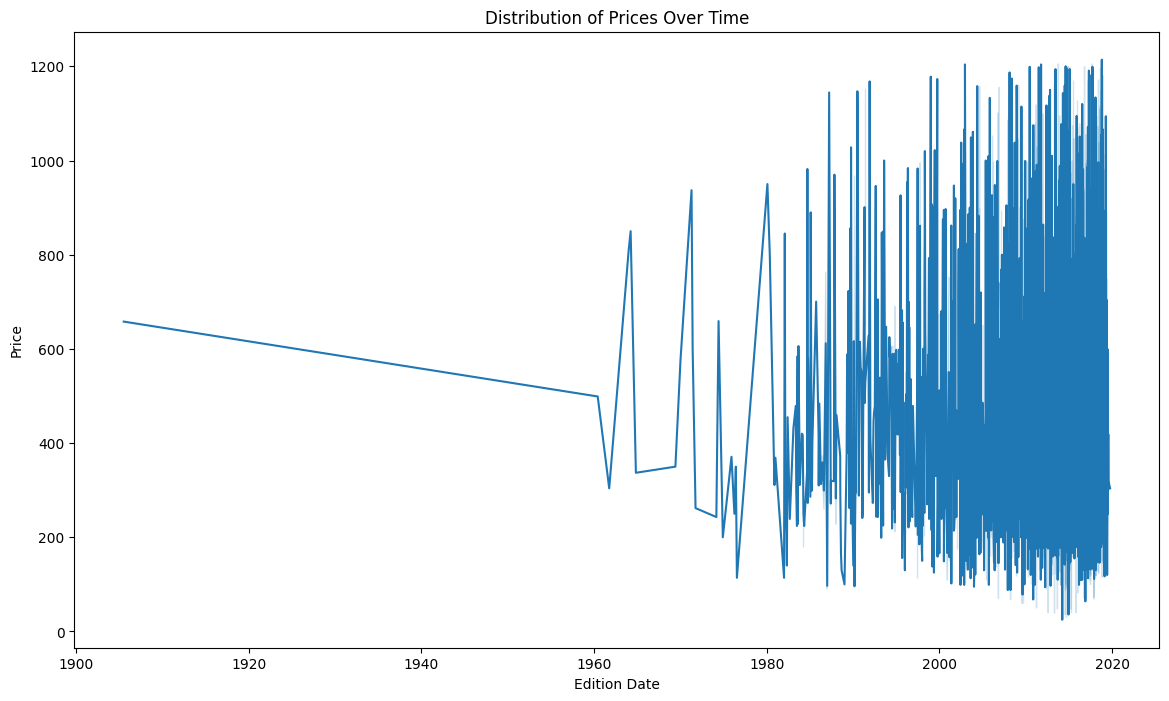

In [31]:
# Distribution of Prices Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Edition_Date', y='Price', data=data)
plt.title('Distribution of Prices Over Time')
plt.xlabel('Edition Date')
plt.ylabel('Price')
plt.show()


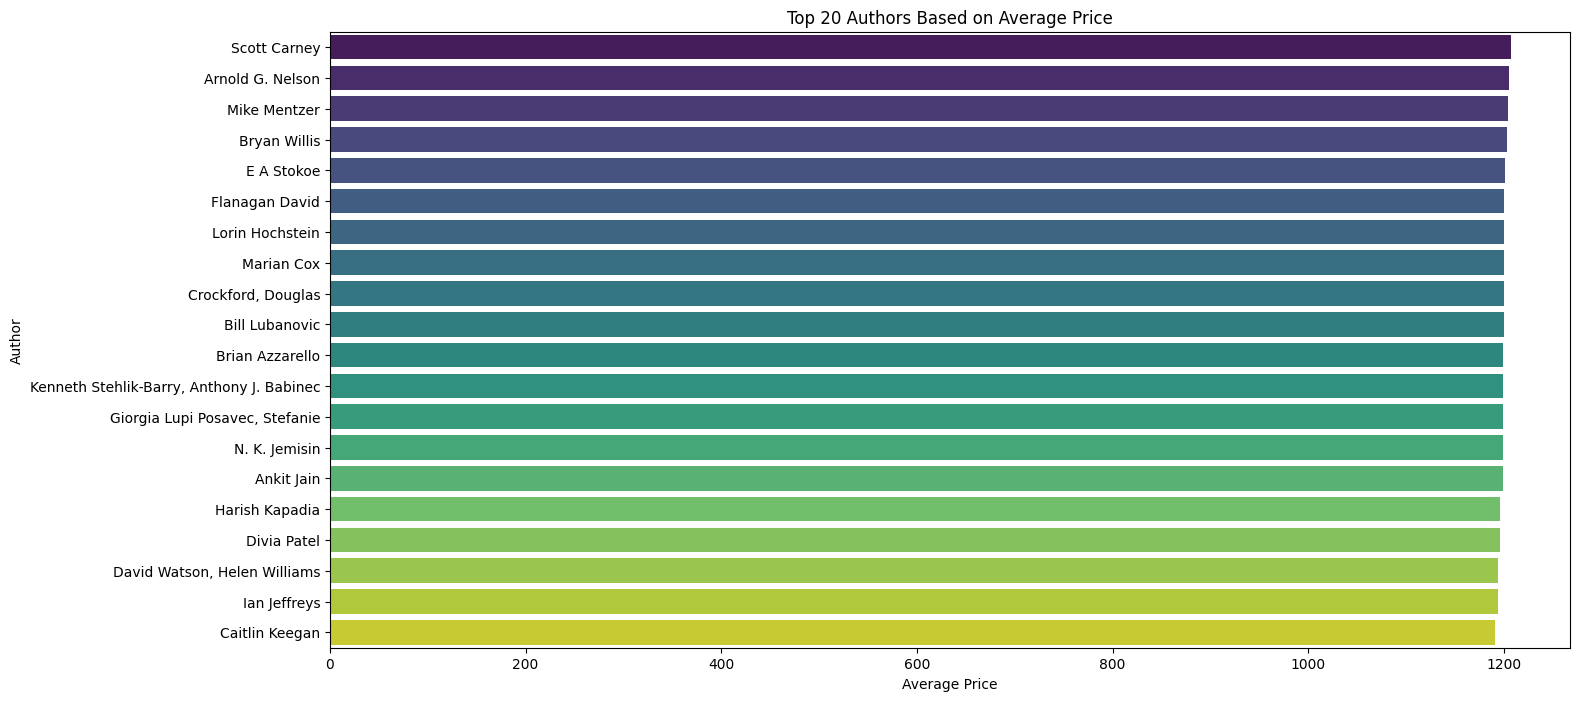

In [32]:
# Group by Author and calculate the average price
top_authors = data.groupby('Author')['Price'].mean().sort_values(ascending=False).head(20)

# Plot the results
plt.figure(figsize=(16, 8))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 20 Authors Based on Average Price')
plt.xlabel('Average Price')
plt.ylabel('Author')
plt.show()


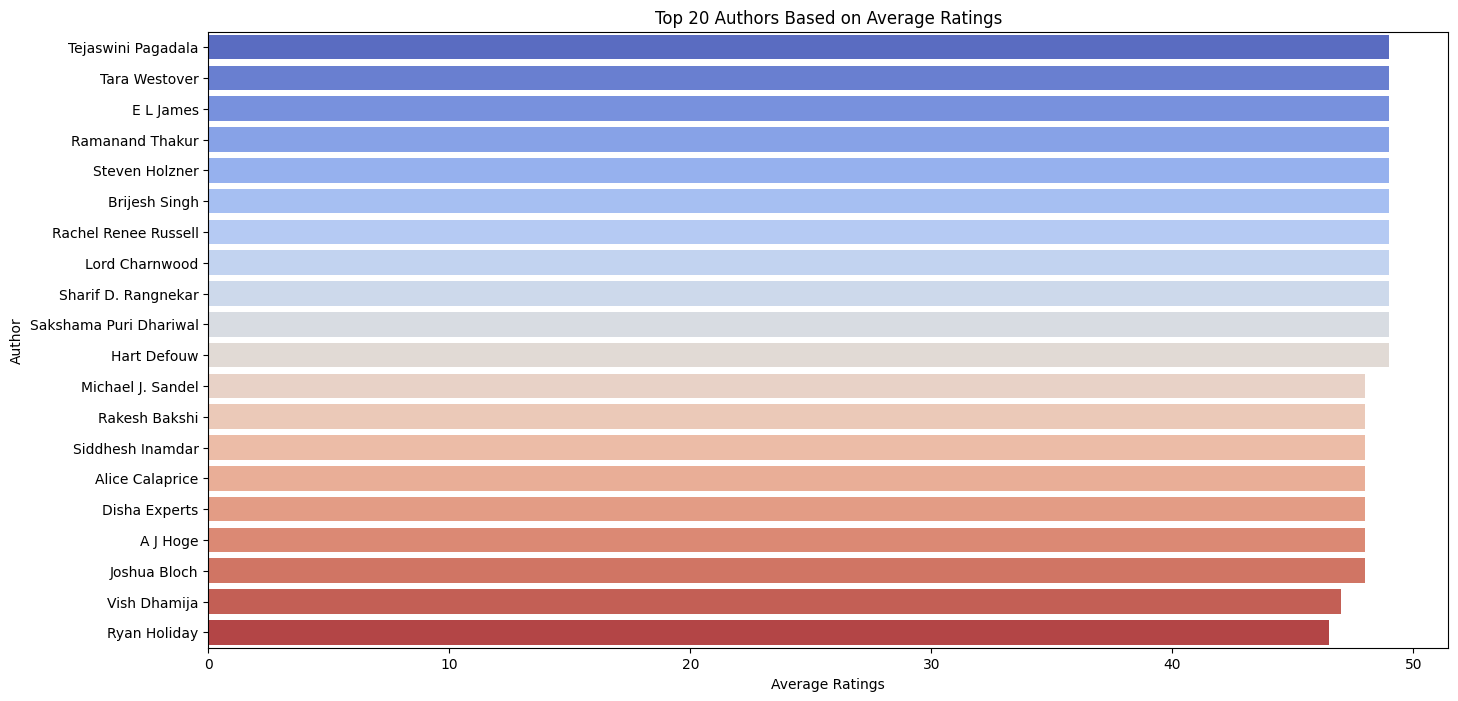

In [33]:
# Group by Author and calculate the average ratings
top_authors_ratings = data.groupby('Author')['Ratings'].mean().sort_values(ascending=False).head(20)

# Plot the results
plt.figure(figsize=(16, 8))
sns.barplot(x=top_authors_ratings.values, y=top_authors_ratings.index, palette='coolwarm')
plt.title('Top 20 Authors Based on Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Author')
plt.show()

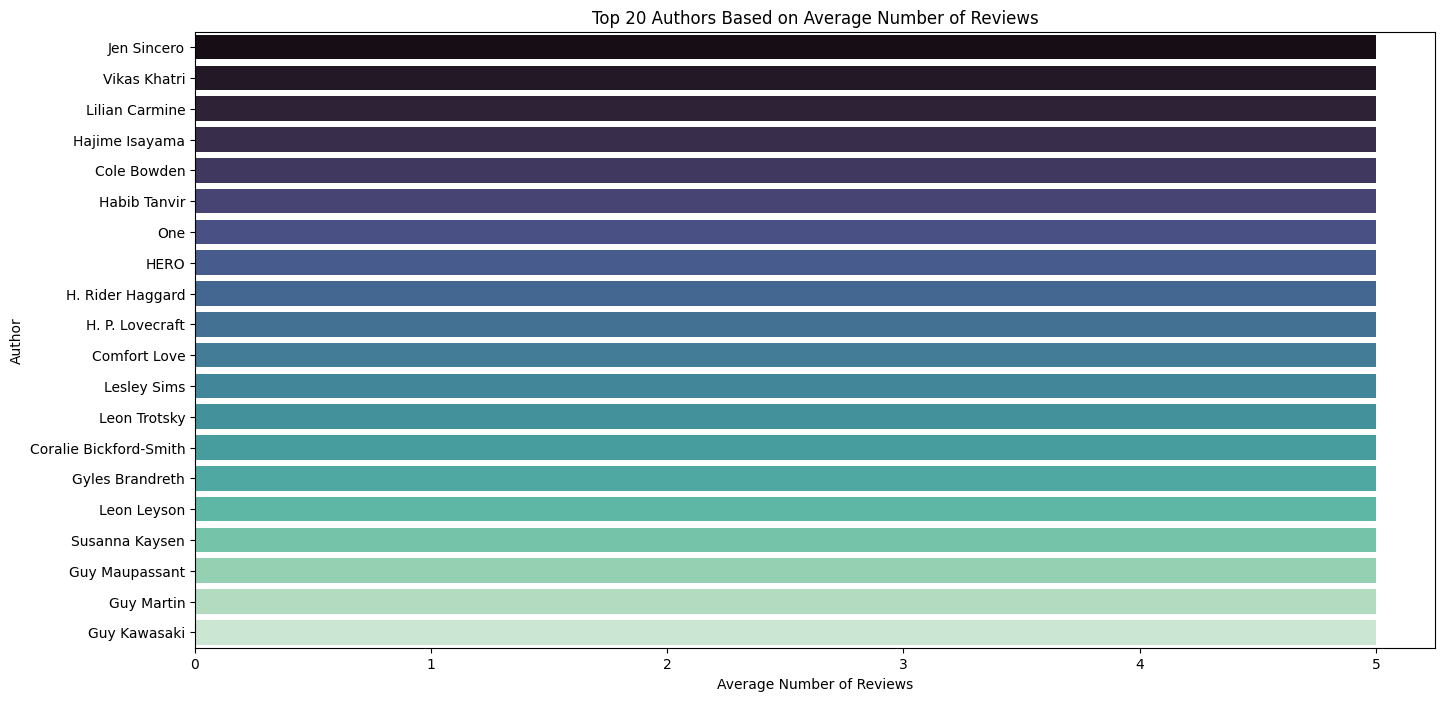

In [34]:
# Group by Author and calculate the average number of reviews
top_authors_reviews = data.groupby('Author')['Reviews'].mean().sort_values(ascending=False).head(20)

# Plot the results
plt.figure(figsize=(16, 8))
sns.barplot(x=top_authors_reviews.values, y=top_authors_reviews.index, palette='mako')
plt.title('Top 20 Authors Based on Average Number of Reviews')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Author')
plt.show()

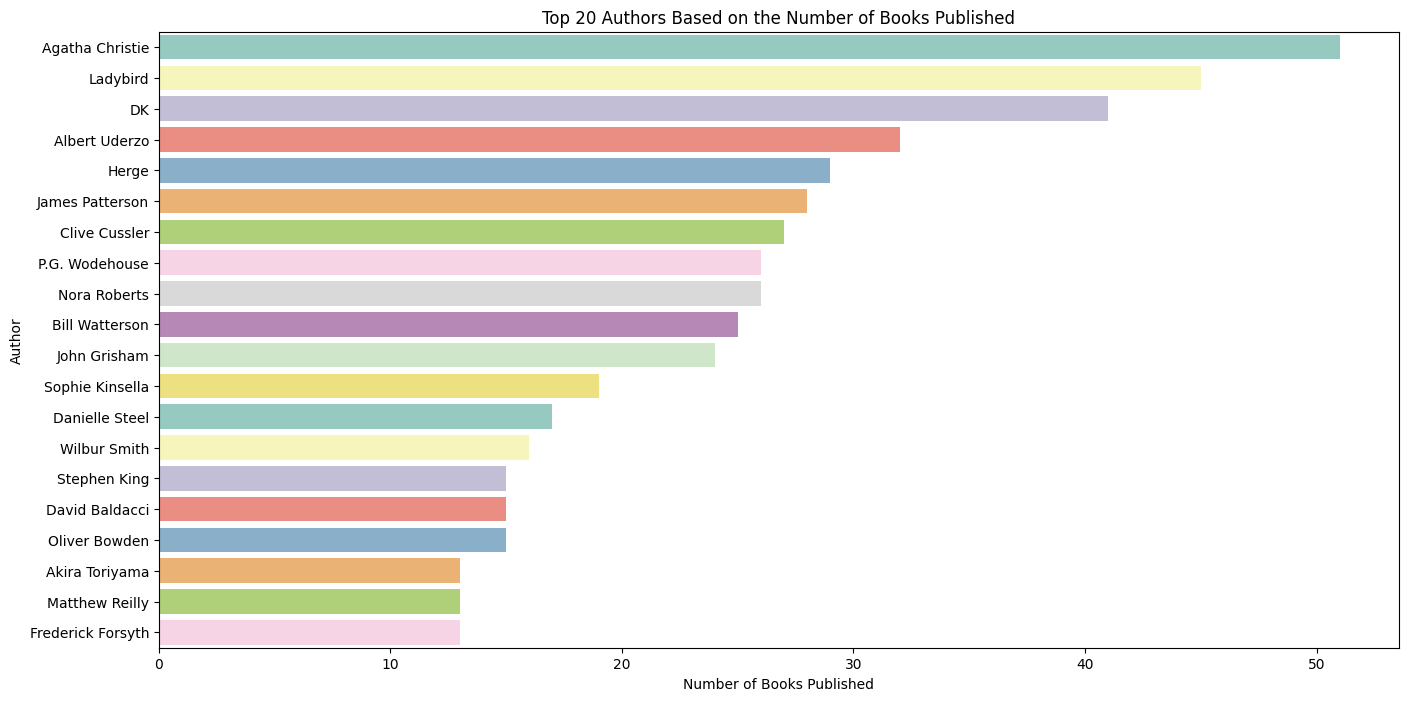

In [35]:
# Count the number of books published by each author
top_authors_books_count = data['Author'].value_counts().head(20)

# Plot the results
plt.figure(figsize=(16, 8))
sns.barplot(x=top_authors_books_count.values, y=top_authors_books_count.index, palette='Set3')
plt.title('Top 20 Authors Based on the Number of Books Published')
plt.xlabel('Number of Books Published')
plt.ylabel('Author')
plt.show()

## Feature Engineering



In [36]:
# Create a new feature for book title length
data['Title_Length'] = data['Title'].apply(lambda x: len(x))

In [37]:
# Create a new feature for author popularity based on total ratings
author_popularity = data.groupby('Author')['Ratings'].sum().reset_index()
author_popularity.columns = ['Author', 'Total_Ratings']
data = pd.merge(data, author_popularity, on='Author', how='left')

In [38]:
# Create a new feature for edition year
data['Edition_Year'] = data['Edition_Date'].dt.year

In [39]:
# Create a new feature for genre count
data['Genre_Count'] = data[genre_columns].sum(axis=1)

In [40]:
# Create a new feature for book synopsis length
data['Synopsis_Length'] = data['Synopsis'].apply(lambda x: len(x.split()))

In [41]:
data['Author_Experience'] = data['Edition_Year'] - data.groupby('Author')['Edition_Year'].transform('min')

In [42]:
data['Edition_Month'] = data['Edition_Date'].dt.month

In [43]:
data['Edition_Day'] = data['Edition_Date'].dt.day

In [44]:
data['Title_Word_Count'] = data['Title'].apply(lambda x: len(x.split()))

In [45]:
data['Author_Avg_Rating'] = data.groupby('Author')['Ratings'].transform('mean')

In [46]:
#data['Author_Avg_Price'] = data.groupby('Author')['Price'].transform('mean')

In [47]:
from textblob import TextBlob

data['Title_Sentiment'] = data['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

Illustrate feature extraction methods, including text feature extraction or any other

In [48]:
#Create a feature for the length of the book synopsis.
data['Synopsis_Length'] = data['Synopsis'].apply(lambda x: len(x.split()))

In [49]:
#Count the number of words in the book synopsis.
data['Synopsis_Num_Words'] = data['Synopsis'].apply(lambda x: len(x.split()))

In [50]:
#Calculate the average length of words in the synopsis.
data['Synopsis_Avg_Word_Length'] = data['Synopsis'].apply(lambda x: np.mean([len(word) for word in x.split()]))

In [51]:
#Perform sentiment analysis on the book synopses.
data['Synopsis_Sentiment'] = data['Synopsis'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [52]:
#Convert the text in the 'Synopsis' column into a Bag of Words representation using tools like CountVectorizer from scikit-learn.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
synopsis_bow = vectorizer.fit_transform(data['Synopsis'])

In [53]:
#TF-IDF (Term Frequency-Inverse Document Frequency):
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
synopsis_tfidf = tfidf_vectorizer.fit_transform(data['Synopsis'])

## Feature transformation

polynomial features

In [54]:
from sklearn.preprocessing import PolynomialFeatures

# Select the numerical features for which you want to create polynomial features
numerical_features = ['Reviews', 'Ratings', 'Title_Length', 'Total_Ratings', 'Synopsis_Length']

# Specify the degree of the polynomial features
degree = 2  # You can adjust this based on the complexity you want

# Instantiate PolynomialFeatures
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

# Apply polynomial transformation to the selected features
poly_data = poly_features.fit_transform(data[numerical_features])

# Create a DataFrame with the new polynomial features
poly_df = pd.DataFrame(poly_data, columns=poly_features.get_feature_names_out(numerical_features))

# Concatenate the new features with the original data
data = pd.concat([data, poly_df], axis=1)


In [55]:
# Extract non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Create a new DataFrame with non-numeric columns
data_non_numeric = data[non_numeric_columns]

# Drop non-numeric columns from the main dataset
data_numeric = data.drop(columns=non_numeric_columns)

In [56]:
# Specify the columns to drop
columns_to_drop = ['Edition_Date', 'Edition_Year', 'Author_Experience', 'Edition_Month', 'Edition_Day']

# Drop the specified columns from data_numeric
data_numeric = data_numeric.drop(columns=columns_to_drop, errors='ignore')

In [57]:
# Check for missing values
data_numeric.isnull().sum()

Reviews                          0
Ratings                          0
Price                            0
Action & Adventure               0
Arts                             0
Biographies                      0
Comics & Mangas                  0
Computing                        0
Crime                            0
Diaries & True Accounts          0
Film & Photography               0
Humour                           0
Internet & Digital Media         0
Language                         0
Linguistics & Writing            0
Politics                         0
Romance                          0
Sports                           0
Thriller & Mystery               0
Title_Length                     0
Total_Ratings                    0
Genre_Count                      0
Synopsis_Length                  0
Title_Word_Count                 0
Author_Avg_Rating                0
Title_Sentiment                  0
Synopsis_Num_Words               0
Synopsis_Avg_Word_Length         0
Synopsis_Sentiment  

In [58]:
from sklearn.model_selection import train_test_split

X = data_numeric.drop('Price', axis=1)  # Features
y = data_numeric['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Do not change this part of the code only run it!

In [59]:
def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y (numpy.ndarray or pandas.Series): The target variable (n_rows, 1) shape.

    Returns:
    float: The mean squared error (MSE) of the predictions(train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions(test data) made by the RandomForestRegressor.
    """
    random_forest_regressor = RandomForestRegressor(criterion='friedman_mse')
    random_forest_regressor.fit(X_train, y_train)
    mse_train = random_forest_regressor.score(X_train, y_train)

    y_pred = random_forest_regressor.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)

    return mse_train, mse_test

In [60]:
mse_train, mse_test = train(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train, mse_test))


Train mse is: 0.8970113856285107 // Test mse is: 46048.18897427398


## Post processing

Error Analysis: Analyzing the model's errors on the test data can provide valuable insights into its strengths and weaknesses. This involves identifying common error patterns, understanding the causes of errors, and exploring strategies to mitigate them.

Feature Importance Analysis: Identifying the most important features contributing to the model's predictions can help in feature selection and dimensionality reduction. This can lead to a more efficient and interpretable preprocessing pipeline.

In [61]:
data = pd.read_excel('/content/drive/MyDrive/test.xlsx')

In [62]:
# Extract numeric part from 'Ratings' column and convert to int
data['Ratings'] = data['Ratings'].str.extract('(\d+)').astype(int)

In [63]:
# Extract numeric part from 'Reviews' column and convert to float
data['Reviews'] = data['Reviews'].str.extract('([\d.]+)').astype(float)

In [64]:
# Extract date and edition type from 'Edition' column
data['Edition_Date'] = data['Edition'].str.extract('(\d+\s\w+\s\d+)', expand=False)
data['Edition_Type'] = data['Edition'].str.extract('(^[^\d]+)')

# Remove ",–" from 'Edition_Type' column
data['Edition_Type'] = data['Edition_Type'].str.replace(',–', '')

# Convert the extracted date to datetime
data['Edition_Date'] = pd.to_datetime(data['Edition_Date'], errors='coerce')

# Verify the changes
data.head()

,Unnamed: 0,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Date,Edition_Type
0,0,Portrait Of A Director:satyajit Ray,Marie Seton,"Paperback,– 19 Jun 2003",4.8,10,The definitive study of the life and work of I...,Biographies & Autobiographies (Books),"Arts, Film & Photography",2003-06-19,Paperback
1,1,More Mindfulness Colouring: More Anti-stress A...,Emma Farrarons,"Paperback,– Import, 24 Sep 2015",3.9,6,"Take a few more minutes out of your day, where...","Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",2015-09-24,"Paperback Import,"
2,2,Palace of Treason: Discover what happens next ...,Jason Matthews,"Paperback,– 21 Apr 2016",3.3,3,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,Action & Adventure (Books),"Crime, Thriller & Mystery",2016-04-21,Paperback
3,3,A History of Political Thought: Plato to Marx,Mukherjee,"Paperback,– 2011",3.8,74,This book presents a study in political tradit...,Political Ideologies (Books),Politics,NaT,Paperback
4,4,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0,1,The remarkable true story of a lone genius who...,Baseball (Books),Sports,2010-05-04,Paperback


In [65]:
# Drop the 'Edition' column
data.drop('Edition', axis=1, inplace=True)

In [66]:
data.shape

(537, 10)

In [67]:
# Split categories in 'BookCategory' and create new binary columns
book_category_split = data['BookCategory'].str.get_dummies(sep=', ')

# Concatenate the new DataFrame with the original one
data = pd.concat([data, book_category_split], axis=1)

In [68]:
# Create a new feature for book title length
data['Title_Length'] = data['Title'].apply(lambda x: len(x))

In [69]:
# Create a new feature for author popularity based on total ratings
author_popularity = data.groupby('Author')['Ratings'].sum().reset_index()
author_popularity.columns = ['Author', 'Total_Ratings']
data = pd.merge(data, author_popularity, on='Author', how='left')

In [70]:
# Create a new feature for edition year
data['Edition_Year'] = data['Edition_Date'].dt.year

In [71]:
# Create a new feature for genre count
data['Genre_Count'] = data[genre_columns].sum(axis=1)

In [72]:
# Create a new feature for book synopsis length
data['Synopsis_Length'] = data['Synopsis'].apply(lambda x: len(x.split()))

In [73]:
data['Author_Experience'] = data['Edition_Year'] - data.groupby('Author')['Edition_Year'].transform('min')

In [74]:
data['Edition_Month'] = data['Edition_Date'].dt.month

In [75]:
data['Edition_Day'] = data['Edition_Date'].dt.day

In [76]:
data['Title_Word_Count'] = data['Title'].apply(lambda x: len(x.split()))

In [77]:
data['Author_Avg_Rating'] = data.groupby('Author')['Ratings'].transform('mean')

In [78]:
from textblob import TextBlob

data['Title_Sentiment'] = data['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [79]:
#Create a feature for the length of the book synopsis.
data['Synopsis_Length'] = data['Synopsis'].apply(lambda x: len(x.split()))

In [80]:
#Count the number of words in the book synopsis.
data['Synopsis_Num_Words'] = data['Synopsis'].apply(lambda x: len(x.split()))

In [81]:
#Calculate the average length of words in the synopsis.
data['Synopsis_Avg_Word_Length'] = data['Synopsis'].apply(lambda x: np.mean([len(word) for word in x.split()]))

In [82]:
#Perform sentiment analysis on the book synopses.
data['Synopsis_Sentiment'] = data['Synopsis'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [83]:
#Convert the text in the 'Synopsis' column into a Bag of Words representation using tools like CountVectorizer from scikit-learn.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
synopsis_bow = vectorizer.fit_transform(data['Synopsis'])

In [84]:
#TF-IDF (Term Frequency-Inverse Document Frequency):
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
synopsis_tfidf = tfidf_vectorizer.fit_transform(data['Synopsis'])

In [85]:
from sklearn.preprocessing import PolynomialFeatures

# Select the numerical features for which you want to create polynomial features
numerical_features = ['Reviews', 'Ratings', 'Title_Length', 'Total_Ratings', 'Synopsis_Length']

# Specify the degree of the polynomial features
degree = 2  # You can adjust this based on the complexity you want

# Instantiate PolynomialFeatures
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

# Apply polynomial transformation to the selected features
poly_data = poly_features.fit_transform(data[numerical_features])

# Create a DataFrame with the new polynomial features
poly_df = pd.DataFrame(poly_data, columns=poly_features.get_feature_names_out(numerical_features))

# Concatenate the new features with the original data
data = pd.concat([data, poly_df], axis=1)


In [86]:
# Extract non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Create a new DataFrame with non-numeric columns
data_non_numeric = data[non_numeric_columns]

# Drop non-numeric columns from the main dataset
data_numeric = data.drop(columns=non_numeric_columns)

In [87]:
# Specify the columns to drop
columns_to_drop = ['Edition_Date', 'Edition_Year', 'Author_Experience', 'Edition_Month', 'Edition_Day']

# Drop the specified columns from data_numeric
data_numeric = data_numeric.drop(columns=columns_to_drop, errors='ignore')

In [88]:
data_numeric = data_numeric.drop('Unnamed: 0', axis=1)

In [89]:
# Check if the columns in the test dataset match the columns in the training dataset
assert set(data_numeric.columns) == set(X_train.columns), "Columns in test data do not match columns in training data."

In [90]:
# Use the trained model to make predictions on the test data

# Redefine the RandomForestRegressor model
random_forest_regressor = RandomForestRegressor(criterion='friedman_mse')
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = random_forest_regressor.predict(data_numeric)

# Assuming 'y_test_pred' contains the predicted prices for the test data


In [91]:
# Assuming 'y_test_pred' contains the predicted prices for the test data

# Create a DataFrame with 'index' and 'Price' columns
result_df = pd.DataFrame({'index': data_numeric.index, 'Price': y_test_pred})

# Save the DataFrame to a CSV file
result_df.to_csv('/content/drive/MyDrive/predictions.csv', index=False)


In [92]:
import shutil

# Define the file paths
predictions_csv_path = '/content/drive/MyDrive/predictions.csv'
drive_export_path = '/content/drive/MyDrive/'

# Save the DataFrame to a CSV file
result_df.to_csv(predictions_csv_path, index=False)

# Move the file to the export folder in your Google Drive
shutil.move(predictions_csv_path, drive_export_path + 'predictions.csv')


'/content/drive/MyDrive/predictions.csv'